# RobotBuilder で 対話的にロボットモデルを作成する

インポート(IRSL標準)

In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())

## RobotBuilderのインスタンスを作る

In [2]:
rb=RobotBuilder()

## ルートリンクを作る / 最初のリンク

Boxを作る0

In [3]:
b0=rb.makeBox(0.3, 0.5, 0.6, color=[0.2, 0.7, 0.2])

Boxを移動する

In [4]:
b0.translate(npa([0,0,0.3]))

Wrap: <coordinates[0x5632b8f354d0] 0 0 0.3 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f9455e730f0>

Boxを作る1

In [5]:
b1=rb.makeBox(0.2, 0.2, 0.05, color=[0.2, 0.7, 0.2])

Boxを移動する

In [6]:
b1.translate(npa([0,0.5/2 + 0.2/2,0.5]))

Wrap: <coordinates[0x5632b8f36d20] 0 0.35 0.5 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f945547abf0>

作ったジオメトリからリンクを作る　/ createLinkFromShape

name: リンク名

root: ルートリンクを作るとき True

density: kg/m^3 ジオメトリを一様密度で重量/重心/慣性を計算

In [7]:
l_root=rb.createLinkFromShape(name='Root', root=True, density=400.0)

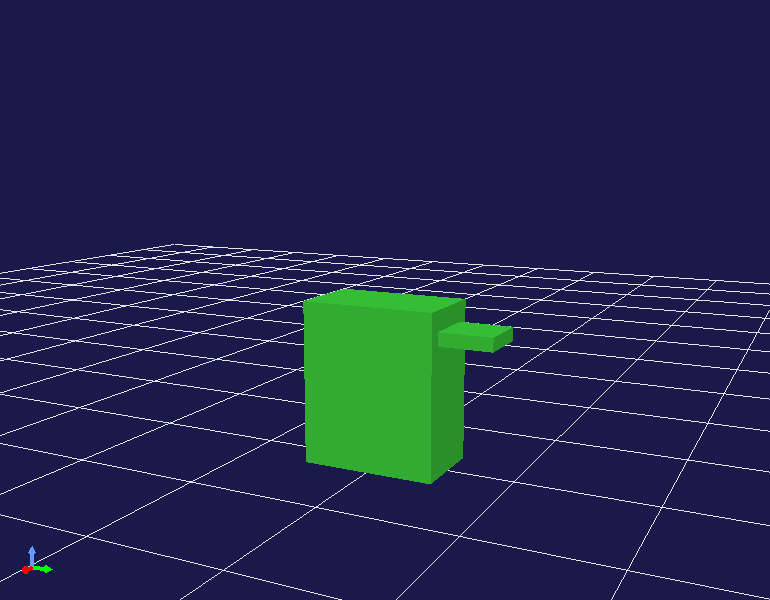

In [8]:
%display

## 関節を作る (LINK0)

関節を作る / createJointShape

jointType: Link.JointType.RevoluteJoint や Link.JointType.PrismaticJoint 

In [9]:
j=rb.createJointShape(jointType=Link.JointType.RevoluteJoint)

関節を移動

In [10]:
j.rotate(-PI/2, coordinates.Z)
j.locate(npa([0, 0.5/2 + 0.2/2 + 0.2/2, 0.5]), coordinates.wrt.world)

Wrap: <coordinates[0x5632b8f38970] 0 0 0 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7f94563308b0>

Wrap: <coordinates[0x5632b8f38970] 0 0.45 0.5 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7f94563308b0>

形状を作る

In [11]:
b2=rb.makeCylinder(0.06, 0.3, color=[0.7, 0.2, 0.2])
b2.rotate(-PI/2, coordinates.Z)
b2.locate(npa([0, 0.5/2 + 0.2/2 + 0.2/2, 0.5]), coordinates.wrt.world)
b3=rb.makeBox(0.1, 0.1, 0.4, color=[0.2, 0.7, 0.2])
b3.locate(npa([0, 0.5/2 + 0.2/2 + 0.2/2, 0.5-0.4/2]), coordinates.wrt.world)

Wrap: <coordinates[0x5632b8f3fc30] 0 0 0 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7f9455e59e70>

Wrap: <coordinates[0x5632b8f3fc30] 0 0.45 0.5 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7f9455e59e70>

Wrap: <coordinates[0x5632b8f38ac0] 0 0.45 0.3 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f94561b67f0>

作ったジオメトリからリンクを作る　/ createLinkFromShape 

表示の位置にリンクが作られる

parentLink: 親リンク

JointId: 設定しないと駆動できる関節とならない

JointName:

InitialJointAngle:

JointRange:

JointVelocityRange:

JointEffortRange:

EquivalentRotorInertia:


In [12]:
l0=rb.createLinkFromShape(name='LINK0', parentLink=l_root, density=400.0, JointId=0, JointName='JOINT0', InitialJointAngle=0.6, JointRange=[0, PI], JointVelocityRange=[-PI*10, PI*10], JointEffortRange=[-100, 100], EquivalentRotorInertia=0.1)

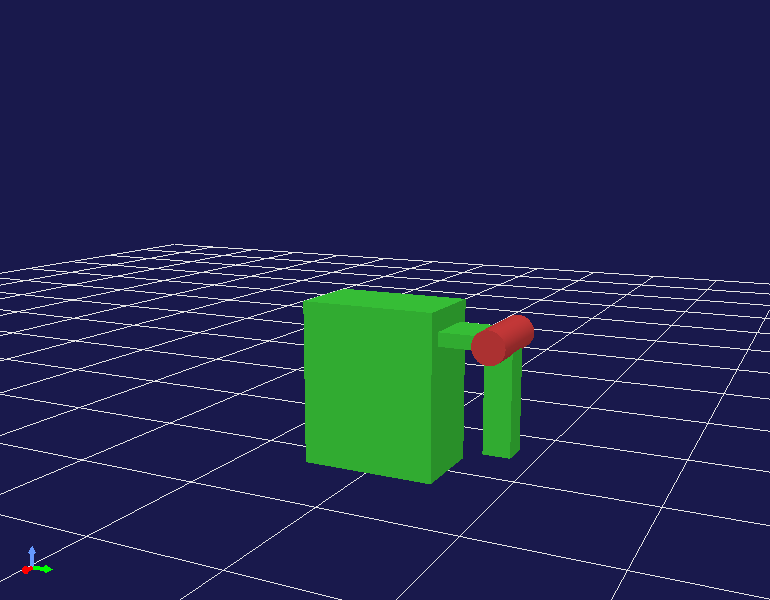

In [13]:
%display

## 関節を作る (LINK1)

関節と形状を作る （代入する必要はない）

In [14]:
rb.createJointShape(jointType=Link.JointType.RevoluteJoint).locate(npa([0, 0.5/2 + 0.2/2 + 0.2/2, 0.5-0.4]), coordinates.wrt.world)
rb.makeCylinder(0.06, 0.3, color=[0.7, 0.2, 0.2]).locate(npa([0, 0.5/2 + 0.2/2 + 0.2/2, 0.5-0.4]), coordinates.wrt.world)
rb.makeBox(0.1, 0.1, 0.4, color=[0.2, 0.7, 0.2]).locate(npa([0, 0.5/2 + 0.2/2 + 0.2/2, 0.5-0.4-0.4/2]), coordinates.wrt.world)

Wrap: <coordinates[0x5632b8f4f400] 0 0.45 0.1 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f94563339b0>

Wrap: <coordinates[0x5632b8f4c520] 0 0.45 0.1 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f945619c3f0>

Wrap: <coordinates[0x5632b8f4f240] 0 0.45 -0.1 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f9456312570>

注意: 親リンクを間違えない

注意: JointId を設定し、正しいidを入れる

JointIdはインデックスになるので、0から順番に番号を飛ばさずに指定されている必要がある

In [15]:
l1=rb.createLinkFromShape(name='LINK1', parentLink=l0, density=400.0, JointId=1, JointName='JOINT1', InitialJointAngle=0.6, JointRange=[-PI/2, PI/2], JointVelocityRange=[-PI*10, PI*10], JointEffortRange=[-100, 100], EquivalentRotorInertia=0.1)

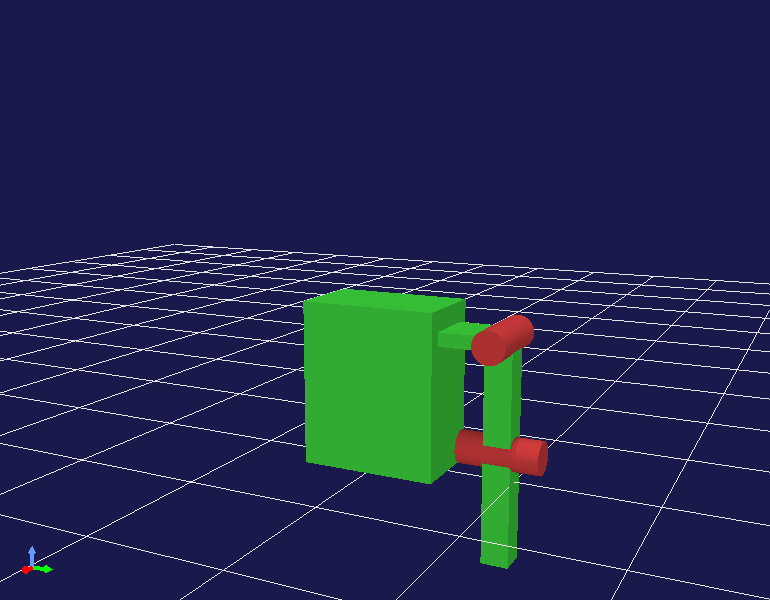

In [16]:
%display

## 関節を作る (LINK2)

直動リンクを作る

In [17]:
rb.createJointShape(jointType=Link.JointType.PrismaticJoint).rotate(-PI/2, coordinates.X).locate(npa([0, 0.5/2 + 0.2/2 + 0.2/2, 0.5-0.4-0.4]), coordinates.wrt.world)
rb.makeBox(0.08, 0.08, 0.3, color=[0.7, 0.2, 0.2]).locate(npa([0, 0.5/2 + 0.2/2 + 0.2/2, 0.5-0.4-0.4+0.3/2]), coordinates.wrt.world)
rb.makeBox(0.14, 0.14, 0.14, color=[0.2, 0.7, 0.2]).locate(npa([0, 0.5/2 + 0.2/2 + 0.2/2, 0.5-0.4-0.4-0.14/2]), coordinates.wrt.world)

Wrap: <coordinates[0x5632b8f40d90] 0 0.45 -0.3 / -0.707107 0 0 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7f94561b66b0>

Wrap: <coordinates[0x5632b8f5e930] 0 0.45 -0.15 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f9469ebc170>

Wrap: <coordinates[0x5632b8f45330] 0 0.45 -0.37 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f9456312570>

リンクを作る

In [18]:
l2=rb.createLinkFromShape(name='LINK2', parentLink=l1, density=400.0, JointId=2, JointName='JOINT2', InitialJointAngle=0.6, JointRange=[0, 0.3], JointVelocityRange=[10, 10], JointEffortRange=[-100, 100], EquivalentRotorInertia=0.1)

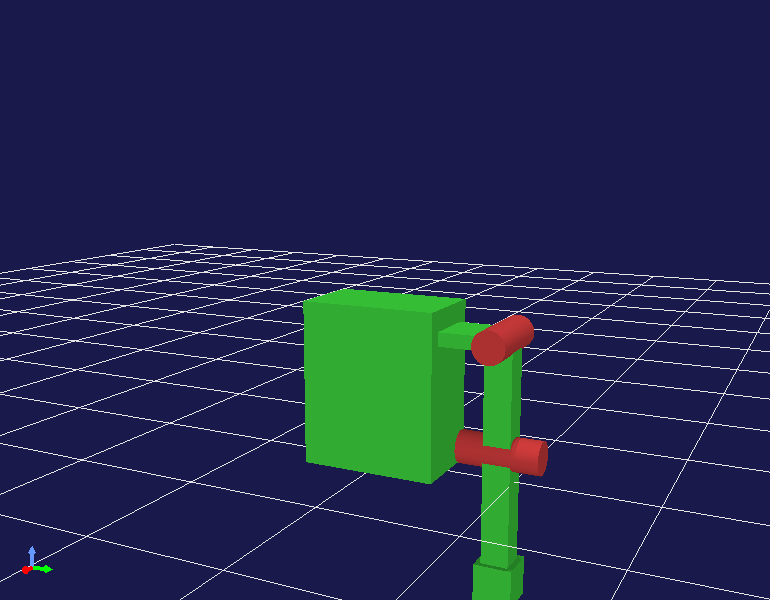

In [19]:
%display

## モデルのビジュアライズ

In [20]:
rb.viewInfo()

[Wrap: <coordinates[0x5632b8f3f3c0] 0 0 0 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f9456324c30>, Wrap: <coordinates[0x5632b8f555c0] 0 0.45 0.5 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7f9469ebc170>, Wrap: <coordinates[0x5632b8f4c520] 0 0.45 0.1 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f9469eb8270>, Wrap: <coordinates[0x5632b8f552e0] 0 0.45 -0.3 / -0.707107 0 0 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7f9456342630>]

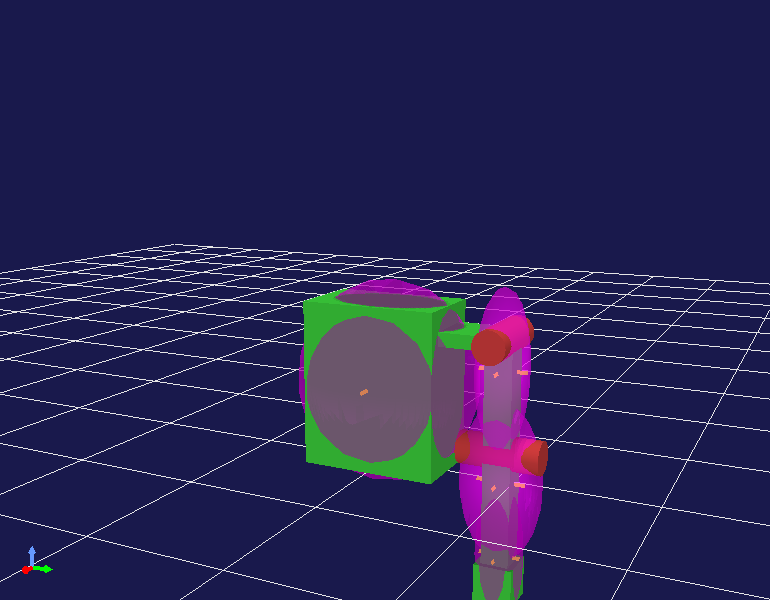

In [21]:
%display

In [31]:
rb.viewInfo(scale=0.25)

[Wrap: <coordinates[0x5632b91b0470] 0 0 0 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7f9455e6cdb0>, Wrap: <coordinates[0x5632b8f4cff0] 0 0.45 0.5 / 0.236037 0.236037 -0.666548 0.666548 > | <cnoid.Util.SgPosTransform object at 0x7f9454992c70>, Wrap: <coordinates[0x5632b91b0050] -5.58949e-17 0.701728 0.189142 / 0.291245 -0.460595 -0.163105 0.822451 > | <cnoid.Util.SgPosTransform object at 0x7f94548c4a70>, Wrap: <coordinates[0x5632b90a2ee0] 0.490268 0.890799 -0.0443415 / -0.375619 -0.210357 -0.441022 0.787502 > | <cnoid.Util.SgPosTransform object at 0x7f945619c1b0>]

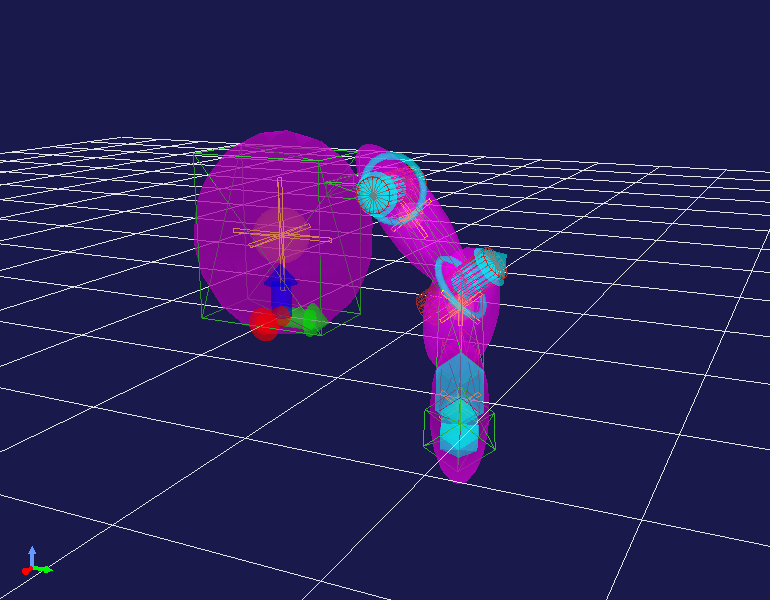

In [32]:
%display

In [30]:
rb.clear()

In [23]:
rb.resetRobot()

## モデルの書き出し

<モデルをロードしてみる>

In [24]:
rb.exportBody('/userdir/builder_sample.body')

True

URDFも出せる（形状まわりは開発中）

In [25]:
rb.exportURDF('/userdir/builder_sample.urdf')

### 手順の説明

一つのリンクを作るために、3つの手順に分かれています。

* (手順1) rb.createJointShape

  ジョイントの種類位置を指定する。ここで半透明なジョイント形状が現れる。 これがlink(== joint)の原点となっている。

* (手順2) rb.makeXXX ### XXX は mkshapes を参照のこと

  リンクに所属する形状を作る。形状作成は複数個あっても良い。 すべての表示が合わさってリンクの形状となる。

* (手順3) rb.createLinkFromShape

  実際のリンクを作る。

(手順1)～(手順3)の繰返しで、choreonoidのbodyインスタンスを逐次的に作っています。


### 画面上の説明

画面に表示されているものは choreonoidのBody(a) と rbに所属する形状(b)に分けられます。

rb.clear() して消えるのが(b)で、消えないのが(a)です。

(手順3)で行っていることは、(b)の形状を(a)に取り込むことです。 【 (a)を改変してリンクを増やしている 】

この手順で (b)の形状はすべて(a)に取り込まれます。【 画面上では (手順1)の半透明形状が消えるだけに見えるはずです 】
